Text(0.5, 0.98, 'Fibre Gaussian - for convolution')

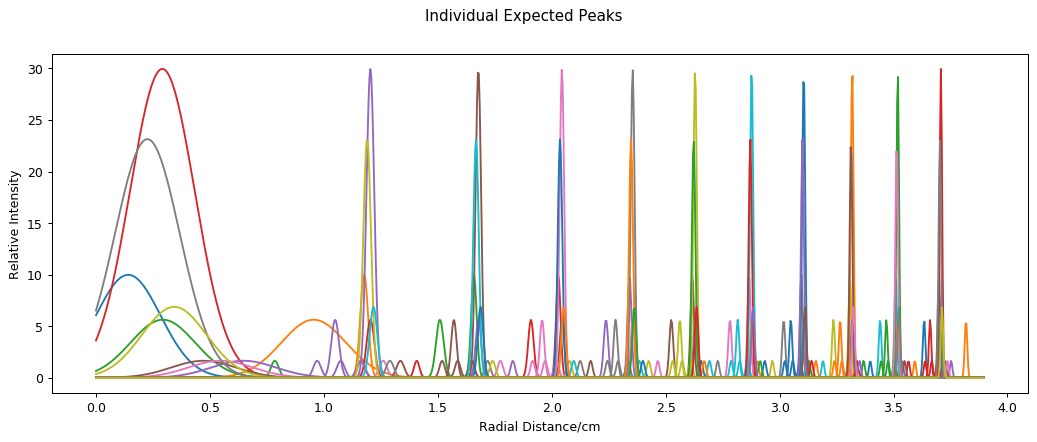

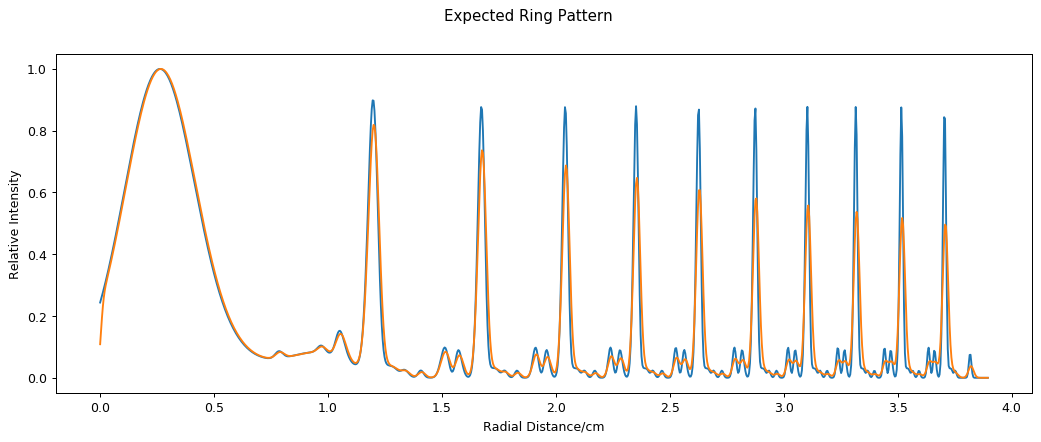

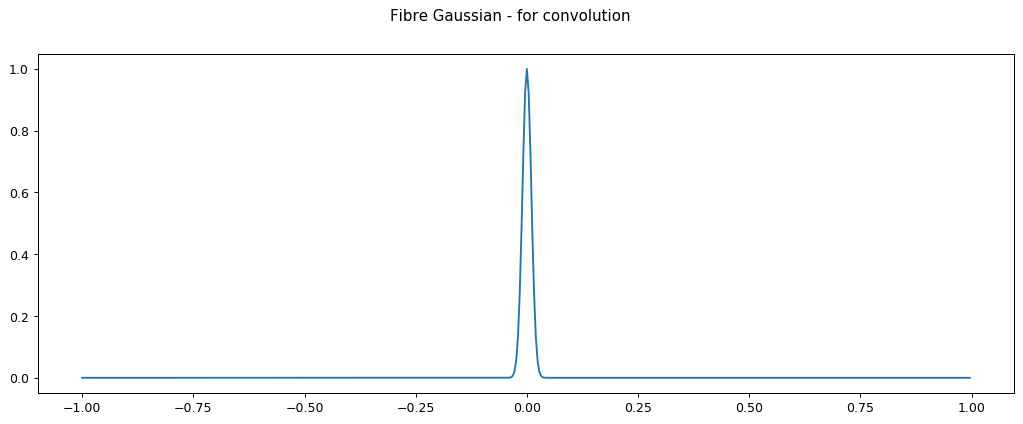

In [3]:
import numpy as np
import matplotlib.pyplot as plt

radii = np.genfromtxt(r'C:\Anaconda\ringdata.csv', delimiter=',')
    #column data corresponds to specific lines and rows correspond to the spectral order, starting at 14652
stdev = np.array([0.030373537,0.014824583,0.010519894,0.008599301,0.007451233,0.006666564,0.006086779,0.005635859,0.005272191,0.004970835,0.004715809])
stdev2 = np.array([0.1416606378,0.01702196379,0.01207921074,0.009873936727,0.00855569576,0.007654718706,0.006988995034,0.006471236401,0.006053664383,0.005707639489,0.005414812538])
amplitude = np.array([9.985,5.631666667,1.6525,5.631666667,29.945,5.631666667,1.6525,1.6525,1.6525,1.6525,1.6525,1.6525,1.6525,23.135,6.88])

def gaussian(r, mu, sig, amp):
    return amp*(np.exp(-(r-mu)**2/ (2 * (sig)**2)))

range_min = 0
range_max = 3.9
r = np.arange(range_min, range_max, 0.004)
r_gauss = np.arange(-1,1,0.004)
total = 0

fig0 = plt.figure(figsize = (14,5), dpi = 90)
plt.ylabel('Relative Intensity')
plt.xlabel('Radial Distance/cm')
plt.suptitle('Individual Expected Peaks')
for i in range(0, np.size(radii,1)):
    #if radii[0,i] != 0:   #0 values must be excluded because they are used as placeholders for invalid datapoints
        for j in range(0, np.size(radii,0)):
            if radii[j,i] != 0:
                plt.plot(r, gaussian(r, radii[j,i], stdev2[j], amplitude[i]))
                total += gaussian(r, radii[j,i], stdev2[j], amplitude[i])

total = total/np.max(total)

fibre_sigma = 1e-2
fibre = gaussian(r_gauss,0,fibre_sigma,0.05)
fibre = fibre/np.max(fibre)

conv = np.convolve(total,fibre,mode='same')
conv /= np.max(conv)

fig1 = plt.figure(figsize = (14,5), dpi = 90)
plt.plot(r,total)
plt.plot(r,conv)
plt.ylabel('Relative Intensity')
plt.xlabel('Radial Distance/cm')
plt.suptitle('Expected Ring Pattern')

#radii_measured = np.genfromtxt(r'C:\Anaconda\ringdata.csv', delimiter=',')
#for i in range(0,np.size(radii_measured,1)):
    #for j in range(0,np.size(radii_measured,0)):
        #if ((radii_measured[j,i] != 0) & (radii_measured[j,i] > range_min) & (radii_measured[j,i] < range_max)):
            #if j == 0:
                #plt.plot(radii_measured[j,i],0,'rx')
            #if j == 1:
                #plt.plot(radii_measured[j,i],0,'bx')
            #if j == 2:
                #plt.plot(radii_measured[j,i],0,'gx')
fig2 = plt.figure(figsize = (14,5), dpi= 90)
plt.plot(r_gauss, fibre)
plt.suptitle('Fibre Gaussian - for convolution')